# Phys 111 Final Project
## Lev Gruber, Charlie Schofield

A simplified model to study a bio-inspired triple spring mechanism. 

This jupyter notebook is arranged into the following sections:
1. **Euler-Lagrange DE and Variable Instantiation** ~ solving for both positions over time.
2. **Classical Regime and Normal Modes**
3. **Varying Mass**
4. **Varying Spring Characteristics**
5. **Surfaces of Section**
6. **Sanity Checks**


## Section 1 - Solving Euler-Lagrange DE and Variable Instantiation*
#### * This section must be run before any other section will function!
Here, we import packages, define a default set of mass and spring constant arguments, define our system of differential equations, and useful functions for the other sections. Note this section does not produce any data or plots.

In [110]:
'''

Imports and LaTex formatting

'''
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve
from scipy.integrate import solve_ivp, odeint

plt.rcParams['text.usetex'] = True

In [130]:
# Define global constants for the system
m_1 = 1
m_2 = 1

#linear spring constants
k_1 = 3
k_2 = 3
k_3 = 3

#quadratic spring constants
c_1 = 1.5
c_2 = 1.5
c_3 = 1.5

default_args = (m_1, m_2, k_1, k_2, k_3, c_1, c_2, c_3)

def deriv(t, q, args):
    '''
    System of DEs for solve_ivp. Note args is formatted as default_args.
    T and L constants set to 1 by default.
    Inputs: 
    - q (array): 
    - t (float): time
    - args (array of 8 floats): mass and spring constants, use default_args when not varying constants
    Outputs:
    - [dq1_dt, dq2_dt, dq1_dot_dt, dq2_dot_dt]
    '''
    # pull out variables from input array
    m_1, m_2, k_1, k_2, k_3, c_1, c_2, c_3 = args
    
    if len(q) != 4:
        print("q = ", q)
        raise ValueError(f"Expected 4 elements in q, but got {len(q)}, q =", q)
    q_1, q_2, v_1, v_2 = q
    
    # define derivatives
    q_1_dot = v_1
    q_2_dot = v_2
    
    # test w/ non-linear springs
    
    v_1_dot = 1/m_1 * (-k_1 * q_1 -  c_1 * q_1 ** 2 + k_2 * (q_2 - q_1) + c_2 * (q_2 - q_1)**2)
    v_2_dot = 1/m_2 * (-k_3 * q_2 - c_3 * q_2**2 - k_2 * (q_2 - q_1) - c_2 * (q_2 - q_1) **2 )
    
    return [q_1_dot, q_2_dot, v_1_dot, v_2_dot]

def hamilton_cons_2nd_order(result):
    '''
    
    For non-linear spring system w/ only quadratic term
    
    '''
    # parse results input
    l = 1
    
    q_1 = result.y[0]
    q_2 = result.y[1]
    q_1_dot = result.y[2]
    q_2_dot = result.y[3]
    
    # calculate kinetic and potential energies, combine for hamiltonian
    kin_eng = 1/2 * m_1 * l**2 * q_1_dot **2 + 1/2 * m_2 * l**2 *q_2_dot ** 2
    pot_eng = (k_1 * q_1 **2)/2 + (k_3 * q_2 ** 2)/2 + (k_2 * (q_2 - q_1)**2)/2 + (c_1 * q_1 ** 3)/3 + (c_2 * (q_2 - q_1)**3)/3 + (c_3 * q_2**3)/3
    ham = kin_eng + pot_eng
    return ham

## Section 2 - Classical Regime and Normal Modes

-Charlie

In [ ]:
# Define global constants for the system
m_1 = 1
m_2 = 1
l = 1

#linear spring constants
k_1 = 1
k_2 = 1
k_3 = 1

#quadratic spring constants
c_1 = 0
c_2 = 0
c_3 = 0

# Choose initial conditions
y0 = [0, 0, 0, -.5]

# Set time span
t_start = 0.1
t_end = 100
t = np.linspace(t_start, t_end, 10000)
normal_args = [m_1, m_2, k_1, k_2, k_3, c_1, c_2, c_3]
# Solve the system using solve_ivp
result = solve_ivp(deriv, [t_start, t_end], y0, t_eval=t, method='LSODA', rtol=1e-6, atol=1e-8, args = [normal_args])

#plot phase space of our two points
print('plot the original variables we were tracking')
plt.plot(result.y[0], m_1 * result.y[2], label=r'pos. vs. vel of $m_1$')
plt.plot(result.y[1], m_2 * result.y[3], label=r'pos. vs. vel of $m_2$')
plt.title('raw results from our simulation')
plt.legend()
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.show()

#let's plot normal modes
#we can rip the stuff from Lec 14 notes
M = l**2 * np.array([[m_1, 0],
                     [0, m_2]])
M_inv = np.linalg.inv(M)

K = np.array([[k_1 + k_2, -k_2     ],
              [-k_2     ,  k_2 + k_3]])

eigenvalues, eigenvectors = np.linalg.eig(M_inv @ K)

print('now we plot the normal modes and see if we recover simple harmonic motion')

#choose new degrees of freedom
first_mode_position = eigenvectors[0][0] * result.y[0] + eigenvectors[0][1] * result.y[1]
second_mode_position = eigenvectors[1][0] * result.y[0] + eigenvectors[1][1] * result.y[1]

first_mode_momentum = eigenvectors[0][0] * m_1 * result.y[2] + eigenvectors[0][1] * m_2 * result.y[3]
second_mode_momentum = eigenvectors[1][0] * m_1 * result.y[2] + eigenvectors[1][1] * m_2 * result.y[3]

#plotting
plt.plot(first_mode_position, first_mode_momentum, label=r'pos. vs. momentum of mode 1')
plt.plot(second_mode_position, second_mode_momentum, label=r'pos. vs. momentum of mode 2')

plt.title('results in normal mode decomposition')
plt.legend()
plt.xlabel('Position')
plt.ylabel('Momentum')
plt.show()

#only works for m1=m2 and k1=k3 but that's all lecture technically covered from what i can see sooooo

## Section 3 - Varying Mass
We vary one mass while keeping the other constant to analyze non-linear motion

In [ ]:
def plot_mass_motion(masses, init_cond):
    '''
    Solves DEs and plots motion
    Inputs:
    masses (floats): formatted as [[m1, m2], [m1, m2], ...]
    init_cond (floats): formatted as [q1, q2, v1, v2] 
    Outputs:
    None, prints in notebook
    '''
    # instantiate figure
    fig, axs = plt.subplots(4, 2, figsize = (15,10))
    axs = axs.flatten() # we do not care about order of plots
    for i, m in enumerate(masses):
        m_1 = m[0] # set masses
        m_2 = m[1]

        t_start = 0
        t_end = 20
        t = np.linspace(t_start, t_end, 100000)
        
        mass_args = (m_1, m_2, *default_args[2:]) # use default args except for mass

        # solve euler-lagrange equations
        result = solve_ivp(deriv, [t_start, t_end], init_cond, t_eval=t, method='LSODA', rtol=1e-8, atol=1e-10, args = [mass_args])
        
        axs[i].plot(result.t, result.y[0], label = f"Mass 1 = {m_1}")
        axs[i].plot(result.t, result.y[1], label = f"Mass 2 = {m_2}")
        #axs[i].set_xlabel('Time (t)') #note, commented out portion can be used to label a single plot within the fig.
        #axs[i].set_ylabel('Position (q)')
        #axs[i].set_title(r"Dynamics of Linear Springs with ICs: $q_1 = -0.5, \ q_2 = 0.5$")
        axs[i].legend(loc = "upper right")    
    fig.supxlabel("Time (s)", fontsize = 18)
    fig.supylabel("Position (q)", fontsize = 18)
    fig.suptitle(r"Varying Mass with ICs: $q_1 = -0.5, \ q_2 = 0.5$", fontsize = 22)
    fig.subplots_adjust(top=0.925, bottom=0.075, left = 0.075, right = 0.925, wspace = 0.1, hspace = 0.35)
masses = [[1, 0.1], [1, 0.5], [1, 1], [1, 2], [1, 7], [1, 10], [1, 13], [1, 25]]
init_cond = [-0.5, 0.5, 0, 0]
plot_mass_motion(masses, init_cond)

## Section 4 - Varying Spring Characteristics

In [ ]:
def plot_springconst_motion(constants, init_cond):
    '''
    Solves DEs and plots motion
    Inputs:
    constants (floats): formatted as [[k1, k2, k3, c1, c2, c3], ...]
    init_cond (floats): formatted as [q1, q2, v1, v2] 
    Outputs:
    None, prints in notebook
    '''
    # instantiate figure
    fig, axs = plt.subplots(4, 2, figsize = (15,10))
    axs = axs.flatten() # we do not care about order of plots
    for i, consts in enumerate(constants):
        t_start = 0
        t_end = 20
        t = np.linspace(t_start, t_end, 100000)

        spring_args = (*default_args[0:2], *consts) 
        # solve euler-lagrange equations
        result = solve_ivp(deriv, [t_start, t_end], init_cond, t_eval=t, method='LSODA', rtol=1e-8, atol=1e-10, args  = [spring_args])
        
        axs[i].plot(result.t, result.y[0], label = f"k1/c1 = {spring_args[2]}, {spring_args[5]}")
        axs[i].plot(result.t, result.y[1], label = f"k2/c2 = {spring_args[3]}, {spring_args[6]}")
        axs[i].plot([0], [0], label = f"k3/c3 = {spring_args[4]}, {spring_args[7]}")
        axs[i].legend(loc = "upper right")
    fig.supxlabel("Time (s)", fontsize = 18)
    fig.supylabel("Position (q)", fontsize = 18)
    fig.suptitle(r"Varying Spring Constants with $m_1 = m_2$, ICs: $q_1 = -0.5, \ q_2 = 0.5$", fontsize = 22)
    fig.subplots_adjust(top=0.925, bottom=0.075, left = 0.075, right = 0.925, wspace = 0.1, hspace = 0.35)

constants= [[1,1,1, 0, 0, 0], [3, 3, 3, 0, 0, 0], [5, 5, 5, 0, 0, 0], [7 ,7, 7, 0, 0, 0], [3, 3, 3, 0.5, 0.5, 0.5], [3, 3, 3, 1, 1, 1], [3, 3, 3, 1.5, 1.5, 1.5], [3, 3, 3, 1.8, 1.8, 1.8]]
init_cond = [-0.5, 0.5, 0, 0]
plot_springconst_motion(constants, init_cond)

## Section 5 - Surfaces of Section
We generate surfaces of section for different initial conditions at our default mass and spring constants. To do so, we track a chunk of time when one of the masses' positions passes their zero, then recursively cut down this chunk until we find exactly when it occurs. We then plot velocity vs. position for q1 passing zero and q2 passing zero, separately. Note that this iteration takes ~4 minutes (on my laptop) to run. 

*Note, be careful of inputting realistic initial conditions--the code will break if the ICs are non-realistic*

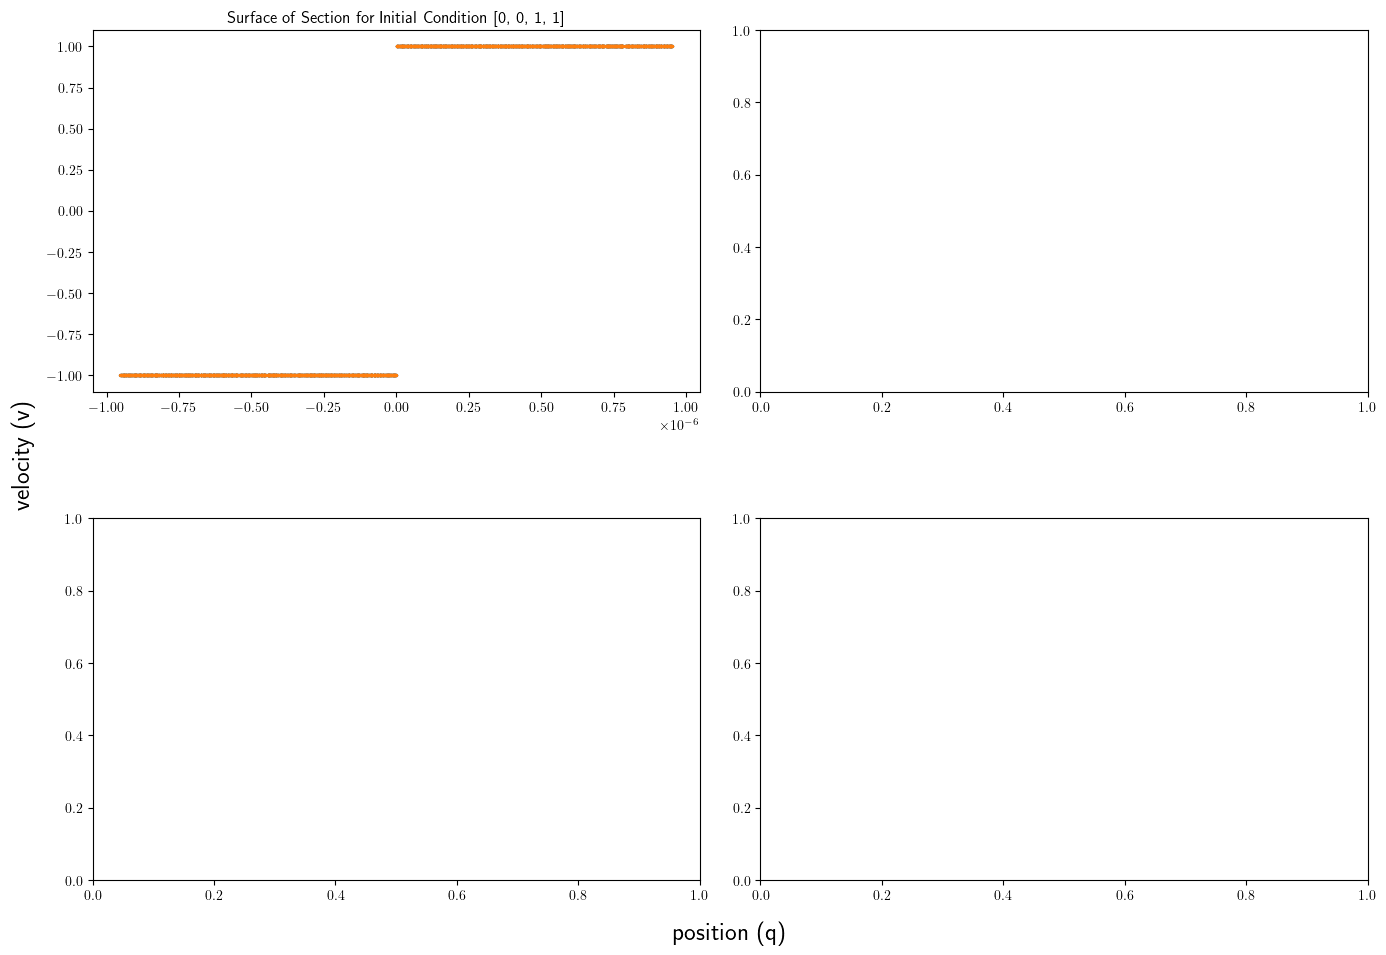

In [129]:
# instantiate a set of initial conditions ~ not currently used
init_conds = [[0, 0, 1, 1], [0.5, -0.5, 0, 0], [0, 0, -1, 1], [-0.6, -0.3, 0.7, -0.6]] 

##### New method

def find_crossing(t_prev, y_prev, T, L):
    """
    Recursively determines the values of position and velocity when one spring passes its zero
    """
    # Solve DE for a small time chunk
    t_eval = np.linspace(t_prev, t_prev + T, 1000)
    result = solve_ivp(deriv, [t_prev, t_prev + T], y_prev, t_eval=t_eval, method='LSODA', rtol=1e-8, atol=1e-10, args = [(1, 1, *default_args[2:])])
    
    # Check for crossing
    if (result.y[1][0] > 0 and result.y[1][-1] < 0) or (result.y[1][0] < 0 and result.y[1][-1] > 0):
        if T < 1e-6:  # Ensure the time step is small enough
            return result
        else:
            return find_crossing(t_prev, y_prev, T / 2, L / 2)
    else:  # If no crossing, advance time and keep going
        return find_crossing(t_prev + T, result.y[:, -1], T, L)

# Main loop
def find_sos(y0, hold_q2 = True):
    '''
    Generates a surface of section for q1 or q2 crossing zero.
    Inputs:
    y0 - initial condition []
    '''
    t_prev = 0
    sos_num = 2000
    t_sos_vals = []
    q_sos_vals = []
    v1_sos_vals = []
    v2_sos_vals = []
 
    y_prev = y0
    
    T = 1 # update with non-dimensionalized time coefficient
    L = 1
    while len(q_sos_vals) < sos_num:
        t_eval = np.linspace(t_prev, t_prev + T, 1000)
        result = solve_ivp(deriv, [t_prev, t_prev + T], y_prev, t_eval=t_eval, method='LSODA', rtol=1e-8, atol=1e-10, args = [(1, 1, *default_args[2:])])

        # check crossing
        if hold_q2:
            # Check for crossing
            if (result.y[1][0] > 0 and result.y[1][-1] < 0) or (result.y[1][0] < 0 and result.y[1][-1] > 0):
                output = find_crossing(t_prev, y_prev, T, L)
                t_sos_vals.append(output.t[-1])
                q_sos_vals.append(output.y[0][-1])
                v1_sos_vals.append(output.y[2][-1])
                v2_sos_vals.append(output.y[3][-1])
            
        else:
            # Check for crossing
            if (result.y[0][0] > 0 and result.y[0][-1] < 0) or (result.y[0][0] < 0 and result.y[0][-1] > 0):
                output = find_crossing(t_prev, y_prev, T, L)
                t_sos_vals.append(output.t[-1])
                q_sos_vals.append(output.y[0][-1])
                v1_sos_vals.append(output.y[2][-1])
                v2_sos_vals.append(output.y[3][-1])
            
            # Update initial state for the next iteration
        t_prev = result.t[-1]
        y_prev = result.y[:, -1]
    return t_sos_vals, q_sos_vals, v1_sos_vals, v2_sos_vals 

fig, axs = plt.subplots(2, 2, figsize = (15,10))
axs = axs.flatten()
for i, y0 in enumerate(init_conds):
    if y0 == 'no':
        break
    t_sos_vals, q1_sos_vals, v1_sos_vals, v2_sos_vals = find_sos(y0, hold_q2=True)
    axs[i].scatter(q1_sos_vals, v1_sos_vals, s=2, label='q1 fixed')
    t_sos_vals, q_sos_vals, v1_sos_vals, v2_sos_vals = find_sos(y0, hold_q2=False)
    axs[i].scatter(q_sos_vals, v2_sos_vals, s=2)
    axs[i].set_title(f'Surface of Section for Initial Condition {y0}')
fig.supxlabel("position (q)", fontsize = 18)
fig.supylabel("velocity (v)", fontsize = 18)
fig.subplots_adjust(top=0.925, bottom=0.075, left = 0.075, right = 0.925, wspace = 0.1, hspace = 0.35)

## Section 6 - Sanity Checks
Here we have sample code for a single position vs. time solution, and a check for hamiltonian (energy in this case) conservation.

We find that the hamiltonian is conserved up to floating point error.

The solver successfully reached the end of the integration interval.
A single point has q_1 0.291 q_2 -0.655 q_1_dot -1.319 q_2_dot 0.8


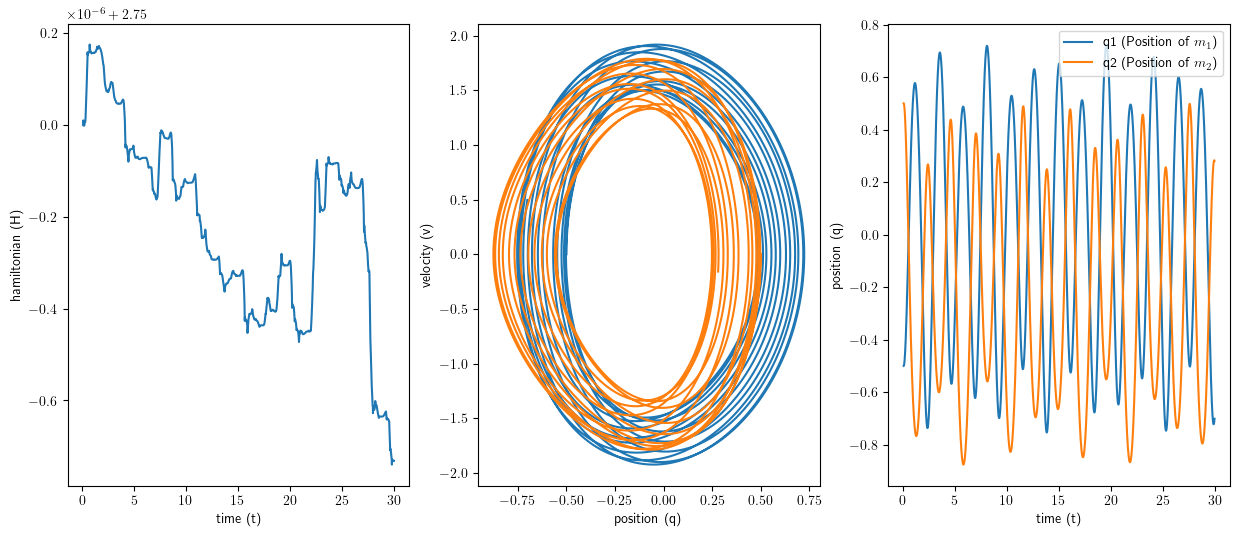

In [131]:
'''
Run this block to check Hamiltonian conservation (conservation of energy)
'''
# Instantiate initial conditions
y0 = [-0.5, 0.5, 0, 0]
# Instantiate time span
t_start = 0.1
t_end = 30
t = np.linspace(t_start, t_end, 10000)

# solve euler-lagrange equations
result = solve_ivp(deriv, [t_start, t_end], y0, t_eval=t, method='LSODA', rtol=1e-8, atol=1e-10, args = [default_args])
#ham_result = hamilton_cons(result)
ham_result = hamilton_cons_2nd_order(result) 

# Check if the integration was successful
print(result.message)
print('A single point has q_1', round(result.y[0][500],3), 'q_2', round(result.y[1][500],3), 'q_1_dot', round(result.y[2][500],3), 'q_2_dot', round(result.y[3][500],3))


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize= (15, 6))
# plot results as position vs time
ax1.plot(result.t, ham_result, label=r'Hamiltonian $(T + U)$')
ax1.set_ylabel("hamiltonian (H)")
ax1.set_xlabel("time (t)")
# plot phase space result
ax2.plot(result.y[0], m_1 * result.y[2], label=r'pos. vs. vel of $m_1$')
ax2.plot(result.y[1], m_2 * result.y[3], label=r'pos. vs. vel of $m_2$')
ax2.set_xlabel('position (q)')
ax2.set_ylabel('velocity (v)')
# plot hamiltonian results
ax3.plot(result.t, result.y[0], label=r'q1 (Position of $m_1$)')
ax3.plot(result.t, result.y[1], label=r'q2 (Position of $m_2$)')
ax3.set_ylabel("position (q)")
ax3.set_xlabel("time (t)")

plt.legend()




### Old code for reference
Much of the below code is for past versions of this project and is kept purely for reference.

In [132]:
'''

Neo-Hookean Spring Old Code


 # original stuff
#v_1_dot = (1)/(m_1 * l**2) * (c_1 * ( -(1+q_1) + 1/(1+q_1)**2) + c_2 * ( (1 + q_2 - q_1) - 1 / (1 + q_2 - q_1)**2 ))
# #v_2_dot = (1)/(m_2 * l**2) * (c_3 * ( -(1+q_2) + 1/(1+q_2)**2) - c_2 * ( (1 + q_2 - q_1) + 1 / (1 + q_2 - q_1)**2 ))
    
# test w/ linear springs
#v_1_dot = -2*(c_1 / m_1) * q_1 + (c_2 / m_1) * q_2
#v_2_dot = (c_1 / m_2) * q_1 - 2*(c_2 / m_2) * q_2


#didn't work but it's her
# edef hamilton_cons(result):
    
    # parse results input
    q_1 = result.y[0]
    q_2 = result.y[1]
    q_1_dot = result.y[2]
    q_2_dot = result.y[3]
    
    # calculate kinetic and potential energies, combine for hamiltonian
    kin_eng = 1/2 * m_1 *  q_1_dot **2 + 1/2 * m_2 * l**2 *q_2_dot ** 2
    pot_eng = c_1 * ( ((1 + q_1)**2)/2 + 1/(1 + q_1) - 3/2) + c_2 * ( ((1+q_2-q_1)**2)/2 + 1/(1 + q_2 - q_1) - 3/2) + c_3 * ( ((1 + q_2)**2)/2 + 1/(1 + q_2) - 3/2)
    ham = kin_eng + pot_eng
    return ham

#linear springs do work
def hamilton_cons_1st_order(result):
    
    For linear spring system

    # parse results input
    q_1 = result.y[0]
    q_2 = result.y[1]
    q_1_dot = result.y[2]
    q_2_dot = result.y[3]
    k = 5 #c_1
    
    # calculate kinetic and potential energies, combine for hamiltonian
    kin_eng = 1/2 * m_1 * l**2 * q_1_dot **2 + 1/2 * m_2 * l**2 *q_2_dot ** 2
    pot_eng = k * q_1 ** 2 + k * q_2**2 - k * q_1 * q_2
    ham = kin_eng + pot_eng
    return ham
    
'''

'''

Old Surface of Section Code (functional but incredibly inefficient)
y0 = [0, 0, 0.5, -0.5]
    
# Instantiate time span
t_start = 0.1
t_end = 200
t = np.linspace(t_start, t_end, 10000000)

# solve euler-lagrange equations
result = solve_ivp(deriv, [t_start, t_end], y0, t_eval=t, method='LSODA', rtol=1e-8, atol=1e-10)

# instantiate a set of initial conditions ~ not currently used
init_conds = [[0.65, 1.1, 0, 0], [0, 0, 0, 0]] 

# take only points for which x_2 is zero:
q1_sas = [[], [], [], []] #t, q1, v1, v2
for i in range(10000000):
     if abs(result.y[1][i]) < 10e-3:
         q1_sas[0].append(result.t[i])
         q1_sas[1].append(result.y[0][i])
         q1_sas[2].append(result.y[2][i])
         q1_sas[3].append(result.y[3][i])

# # take only points for which x_1 is zero:
q2_sas = [[], [], [], []] #q2, v1, v2
for i in range(10000000):
     if abs(result.y[0][i]) < 10e-3:
         q2_sas[0].append(result.t[i])
         q2_sas[1].append(result.y[1][i])
         q2_sas[2].append(result.y[2][i])
         q2_sas[3].append(result.y[3][i]) 
         
fig, ax = plt.subplots()
ax.scatter(q1_sas[1], q1_sas[2])
ax.scatter(q2_sas[1], q2_sas[2])

'''


"\n\nOld Surface of Section Code (functional but incredibly inefficient)\ny0 = [0, 0, 0.5, -0.5]\n    \n# Instantiate time span\nt_start = 0.1\nt_end = 200\nt = np.linspace(t_start, t_end, 10000000)\n\n# solve euler-lagrange equations\nresult = solve_ivp(deriv, [t_start, t_end], y0, t_eval=t, method='LSODA', rtol=1e-8, atol=1e-10)\n\n# instantiate a set of initial conditions ~ not currently used\ninit_conds = [[0.65, 1.1, 0, 0], [0, 0, 0, 0]] \n\n# take only points for which x_2 is zero:\nq1_sas = [[], [], [], []] #t, q1, v1, v2\nfor i in range(10000000):\n     if abs(result.y[1][i]) < 10e-3:\n         q1_sas[0].append(result.t[i])\n         q1_sas[1].append(result.y[0][i])\n         q1_sas[2].append(result.y[2][i])\n         q1_sas[3].append(result.y[3][i])\n\n# # take only points for which x_1 is zero:\nq2_sas = [[], [], [], []] #q2, v1, v2\nfor i in range(10000000):\n     if abs(result.y[0][i]) < 10e-3:\n         q2_sas[0].append(result.t[i])\n         q2_sas[1].append(result.y[1][i